# Voice Recognition

### Transform audio files into spectrogram images

In [2]:
from pathlib import Path

from utils.audios import plot_spectrogram
from utils.files import increment_path

ROOT = Path("../data/")
DATASET_PATH = increment_path(ROOT / "SpectrogramImages")
DATA_PATH = ROOT / "audio"

In [ ]:
for directory in DATA_PATH.iterdir():
    if not directory.is_dir():
        continue
    for file in directory.iterdir():
        if not file.is_file():
            continue
        if not (DATASET_PATH / directory.name).exists():
            (DATASET_PATH / directory.name).mkdir()
        plot_spectrogram(file, str(DATASET_PATH / directory.name / f"{file.stem}.png"))

### Load images (without channel-flatten)

== Loading Image
LocalBinaryPatternsImageDataset(size=520, num_classes=13, categories={0: 'baohui', 1: 'bochen', 2: 'lai', 3: 'mengyang', 4: 'peiyu', 5: 'shan', 6: 'tian', 7: 'xiang', 8: 'yaobing', 9: 'yaoyi', 10: 'yaoyuan', 11: 'yongqing', 12: 'zhaoyu'})


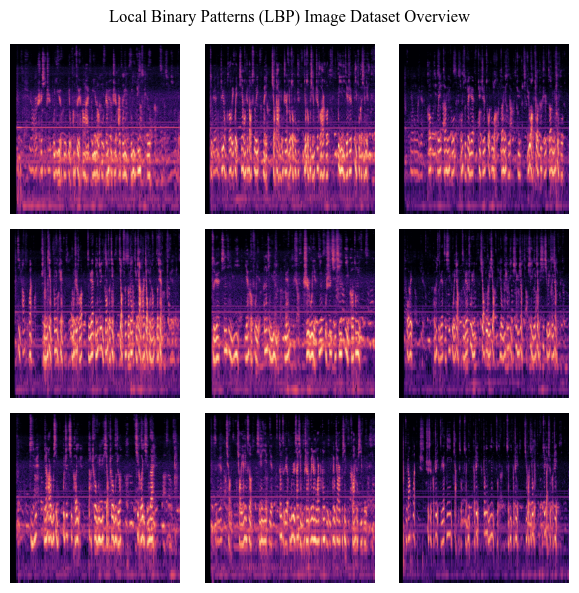

In [3]:
%matplotlib inline
from datasets.lbp import LocalBinaryPatternsImageDataset

DATASET_PATH = ROOT / "SpectrogramImages"
dataset_spectrogram = LocalBinaryPatternsImageDataset()
dataset_spectrogram.load_images(str(DATASET_PATH))
print(dataset_spectrogram)
dataset_spectrogram.overview()

In [4]:
dataset_spectrogram.export_csv(ROOT / "csv", train_test_split=True, train_ratio=0.5)

In [ ]:
dataset_spectrogram.save_lbp_images(ROOT / "lbp")

In [4]:
from datasets.lbp import LocalBinaryPatternsDataset

train_dataset, test_dataset = LocalBinaryPatternsDataset(), LocalBinaryPatternsDataset()
train_dataset.load_csv(ROOT / "csv" / "train.csv")
test_dataset.load_csv(ROOT / "csv" / "test.csv")
print(train_dataset)
print(test_dataset)

In [5]:
from models.lbp import LocalBinaryPatternsClassifierBackend
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

classifier = LocalBinaryPatternsClassifierBackend(
    estimators=[
        SVC(kernel='linear', C=1.0, random_state=42, probability=True),
        RandomForestClassifier(n_estimators=1000, random_state=42)
    ], 
    # scaler=StandardScaler()
)

classifier.train(train_dataset)
classifier.evaluate(test_dataset)

Method: KNN
Distance Function: euclidean
Confusion Matrix: [[14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  1  0  1  6  0  0  1  0  0  1]
 [ 0  0 15  0  0  0  0  0  0  2  0  0  0]
 [ 0  5  0 11  0  0  2  0  3  0  1  0  0]
 [ 0  0  0  0 16  0  0  1  1  0  0  1  0]
 [ 0  0  0  0  0 12  0  0  0  0 11  0  0]
 [ 0  5  1  4  0  0  7  1  0  3  0  0  0]
 [ 0  0  0  0  0  0  0 17  6  1  0  0  0]
 [ 0  0  0  0  0  0  1  4 16  0  0  0  0]
 [ 0  0  1  0  0  0  2  2  3 14  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  0]
 [ 0  1  0  0  0  0  0  0  0  0  1  0 16]]
Accuracy: 0.7153846153846154
Precision: 0.739456837973943
Recall: 0.7282180118530908
F1 Score: 0.7227908120859676


Method: KNN
Distance Function: manhattan
Confusion Matrix: [[14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  0  2  0  0  6  0  0  1  2  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0 10  0  0  2  0  2  1  2  0  1]
 [ 0  0  0  0 17  0  0  1  1  0  0  0  0]
 [ 0  0  

== Loading Image
LocalBinaryPatternsImageDataset(size=520, num_classes=13, categories={0: 'baohui', 1: 'bochen', 2: 'lai', 3: 'mengyang', 4: 'peiyu', 5: 'shan', 6: 'tian', 7: 'xiang', 8: 'yaobing', 9: 'yaoyi', 10: 'yaoyuan', 11: 'yongqing', 12: 'zhaoyu'})


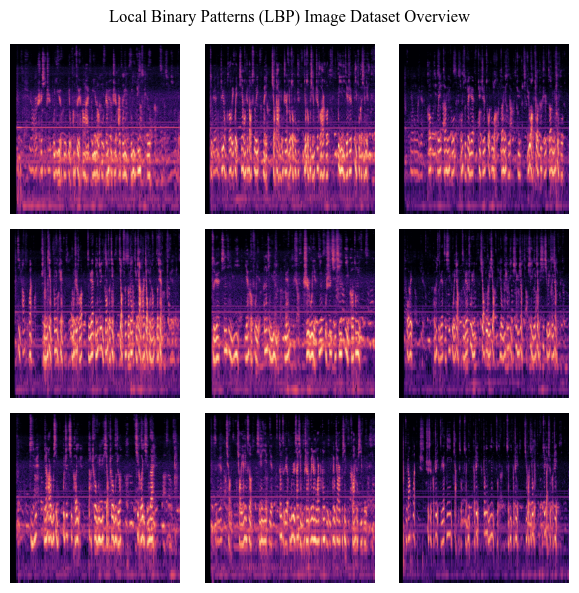

In [6]:
%matplotlib inline
from datasets.lbp import LocalBinaryPatternsImageDataset

DATASET_PATH = ROOT / "SpectrogramImages"
dataset_spectrogram_cf = LocalBinaryPatternsImageDataset()
dataset_spectrogram_cf.load_images(str(DATASET_PATH), channel_flatten=True)
print(dataset_spectrogram_cf)
dataset_spectrogram_cf.overview()

In [7]:
dataset_spectrogram_cf.export_csv(ROOT / "csv-channel-flatten", train_test_split=True, train_ratio=0.5)

In [8]:
from datasets.lbp import LocalBinaryPatternsDataset

train_dataset, test_dataset = LocalBinaryPatternsDataset(), LocalBinaryPatternsDataset()
train_dataset.load_csv(ROOT / "csv-channel-flatten" / "train.csv")
test_dataset.load_csv(ROOT / "csv-channel-flatten" / "test.csv")
print(train_dataset)
print(test_dataset)

In [9]:
from models.lbp import LocalBinaryPatternsClassifierBackend
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

classifier = LocalBinaryPatternsClassifierBackend(
    estimators=[
        SVC(kernel='linear', C=1.0, random_state=42, probability=True),
        RandomForestClassifier(n_estimators=1000, random_state=42)
    ], 
    # scaler=StandardScaler()
)

classifier.train(train_dataset)
classifier.evaluate(test_dataset)

Method: KNN
Distance Function: euclidean
Confusion Matrix: [[14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  2  0  0  5  0  0  2  1  0  0]
 [ 0  0 15  0  0  0  1  0  0  1  0  0  0]
 [ 0  5  0 13  0  0  1  0  3  0  0  0  0]
 [ 0  0  0  0 16  0  0  1  1  0  0  1  0]
 [ 0  0  0  0  0 13  0  0  0  0  9  0  1]
 [ 0  5  1  4  0  0  7  1  0  3  0  0  0]
 [ 0  0  0  0  0  0  0 18  5  1  0  0  0]
 [ 0  0  0  0  0  0  1  4 16  0  0  0  0]
 [ 0  0  1  0  0  0  2  3  2 14  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 22  0]
 [ 0  1  0  0  0  1  0  0  0  0  1  0 15]]
Accuracy: 0.7269230769230769
Precision: 0.7463017605451613
Recall: 0.7374871243830726
F1 Score: 0.7333616119485685


Method: KNN
Distance Function: manhattan
Confusion Matrix: [[14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  3  0  0  6  0  0  1  2  0  0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0 12  0  0  2  0  3  0  0  0  1]
 [ 0  0  0  0 16  0  0  1  1  0  0  1  0]
 [ 0  0 